# Challenge 2: Kernel Ridge Regression and Kernel PCA

<a target="_blank" href="https://colab.research.google.com/github/LucaPennella/Intro_to_ML_23-24/blob/main/challenges/challenge_two.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The challenge is to show why it is better (or not) to use kernelised methods in two toy data sets, and find out which kernel is the most suitable for each.    
There are two main tasks:
1. Ridge Regression vs Kernel Ridge Regression
2. PCA vs Kernel PCA

Tip: *for the whole challenge, you can use ```sklearn```.*

## 1. Ridge Regression
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a linear Ridge Regression model;
* Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

For each subtask, calculate the RMSE on the test data set and plot a visual representation of each fitted line, also when trying different values for the parameters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create training dataset
train_points = 70
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 30

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

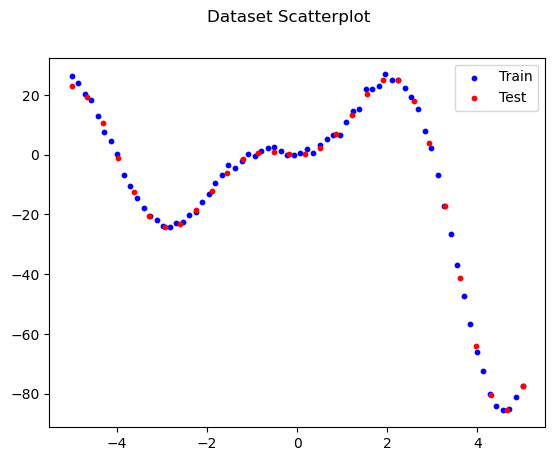

In [3]:
# Plot train and test data
fig, ax = plt.subplots()

ax.scatter(X_train, y_train, color='b', label="Train", s=10)
ax.scatter(X_test, y_test, color='r', label='Test', s=10)
plt.legend()

plt.suptitle("Dataset Scatterplot")
plt.show()

Ridge Regression has:
	 - MSE score of 721.8030662950107
	 - R2 score of 0.2265641739824351


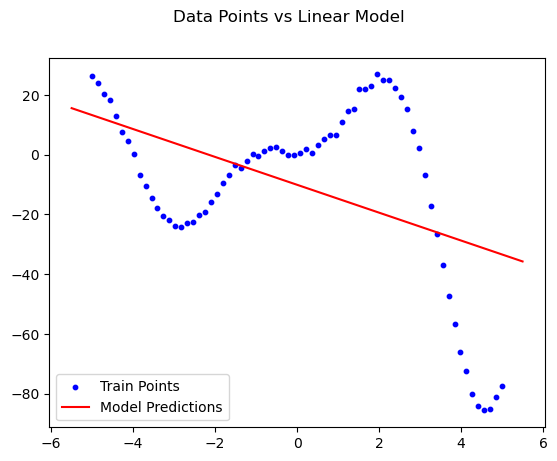

In [4]:
# Fit linear RIDGE REGRESSION
from sklearn.linear_model import Ridge

RR = Ridge(random_state=42)

RR.fit(X_train, y_train)

# Evaluate RR on test set
from sklearn.metrics import mean_squared_error, r2_score

y_hat = RR.predict(X_test)

print(f"Ridge Regression has:\n\t - MSE score of {mean_squared_error(y_test, y_hat)}\n\t - R2 score of {r2_score(y_test, y_hat)}")

# Plot linear RR Predictions
fig, ax = plt.subplots()

predictions = RR.predict(X_train)


ax.scatter(X_train, y_train, color='b', label="Train Points", s=10)
E = np.array(ax.get_xlim())

bias = RR.intercept_
coef = RR.coef_

ax.plot(E, (bias + coef * E).reshape(2), color='r', label="Model Predictions")

plt.legend()
plt.suptitle("Data Points vs Linear Model")

plt.show()


In [5]:
# Conclusion: clearly a massive underfit

In [11]:
# Do a grid search on KRR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
domain_rbf = {
    'gamma': np.logspace(-5, 5, 15)
}
domain_poly = {
    'alpha': np.logspace(0, 4, 10),
    'degree': [2,3,4,5,6,7,8]
}


KRR_rbf = KernelRidge(kernel='rbf')
KRR_poly = KernelRidge(kernel='poly')

GSCV_rbf = GridSearchCV(KRR_rbf, domain_rbf)
GSCV_poly = GridSearchCV(KRR_poly, domain_poly)

GSCV_rbf.fit(X_train, y_train)
GSCV_poly.fit(X_train, y_train)


GridSearchCV(estimator=KernelRidge(kernel='poly'),
             param_grid={'alpha': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'degree': [2, 3, 4, 5, 6, 7, 8]})

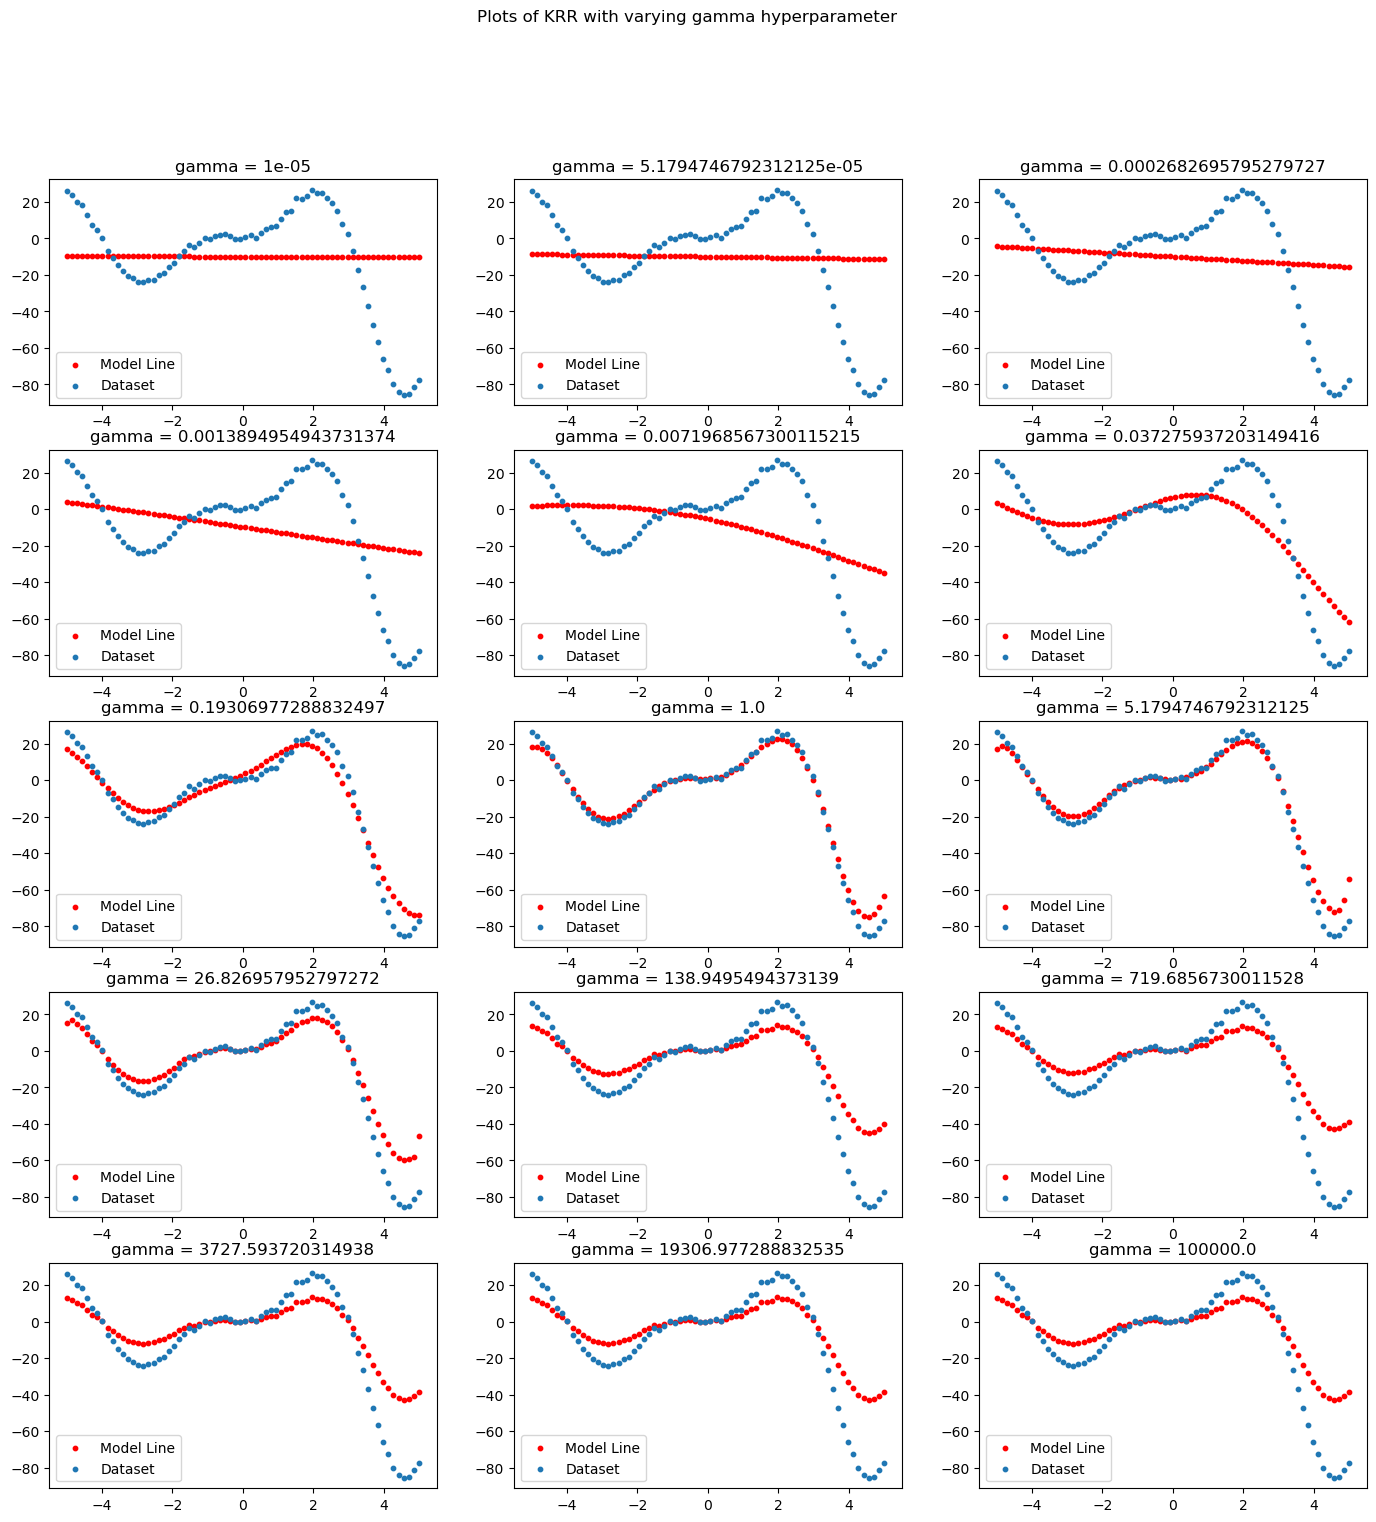

In [14]:
# Test and plot different outcoomes for different values of parameters

# RBF and gamma
fig, axes = plt.subplots(5, 3, figsize=(17,17))

ctr = 0
for i in range(5):
    for j in range(3):
        
        current_axe = axes[i][j]
        current_gamma = domain_rbf['gamma'][ctr]

        current_axe.set_title(f'gamma = {current_gamma}')
        
        KRR_i = KernelRidge(kernel='rbf', gamma=current_gamma).fit(X_train, y_train)

        current_axe.scatter(X_train, KRR_i.predict(X_train), color='r', s=10, label="Model Line")
        current_axe.scatter(X_train, y_train, s=10, label="Dataset")

        current_axe.legend()

        ctr += 1

plt.suptitle("Plots of KRR with varying gamma hyperparameter")
plt.show()

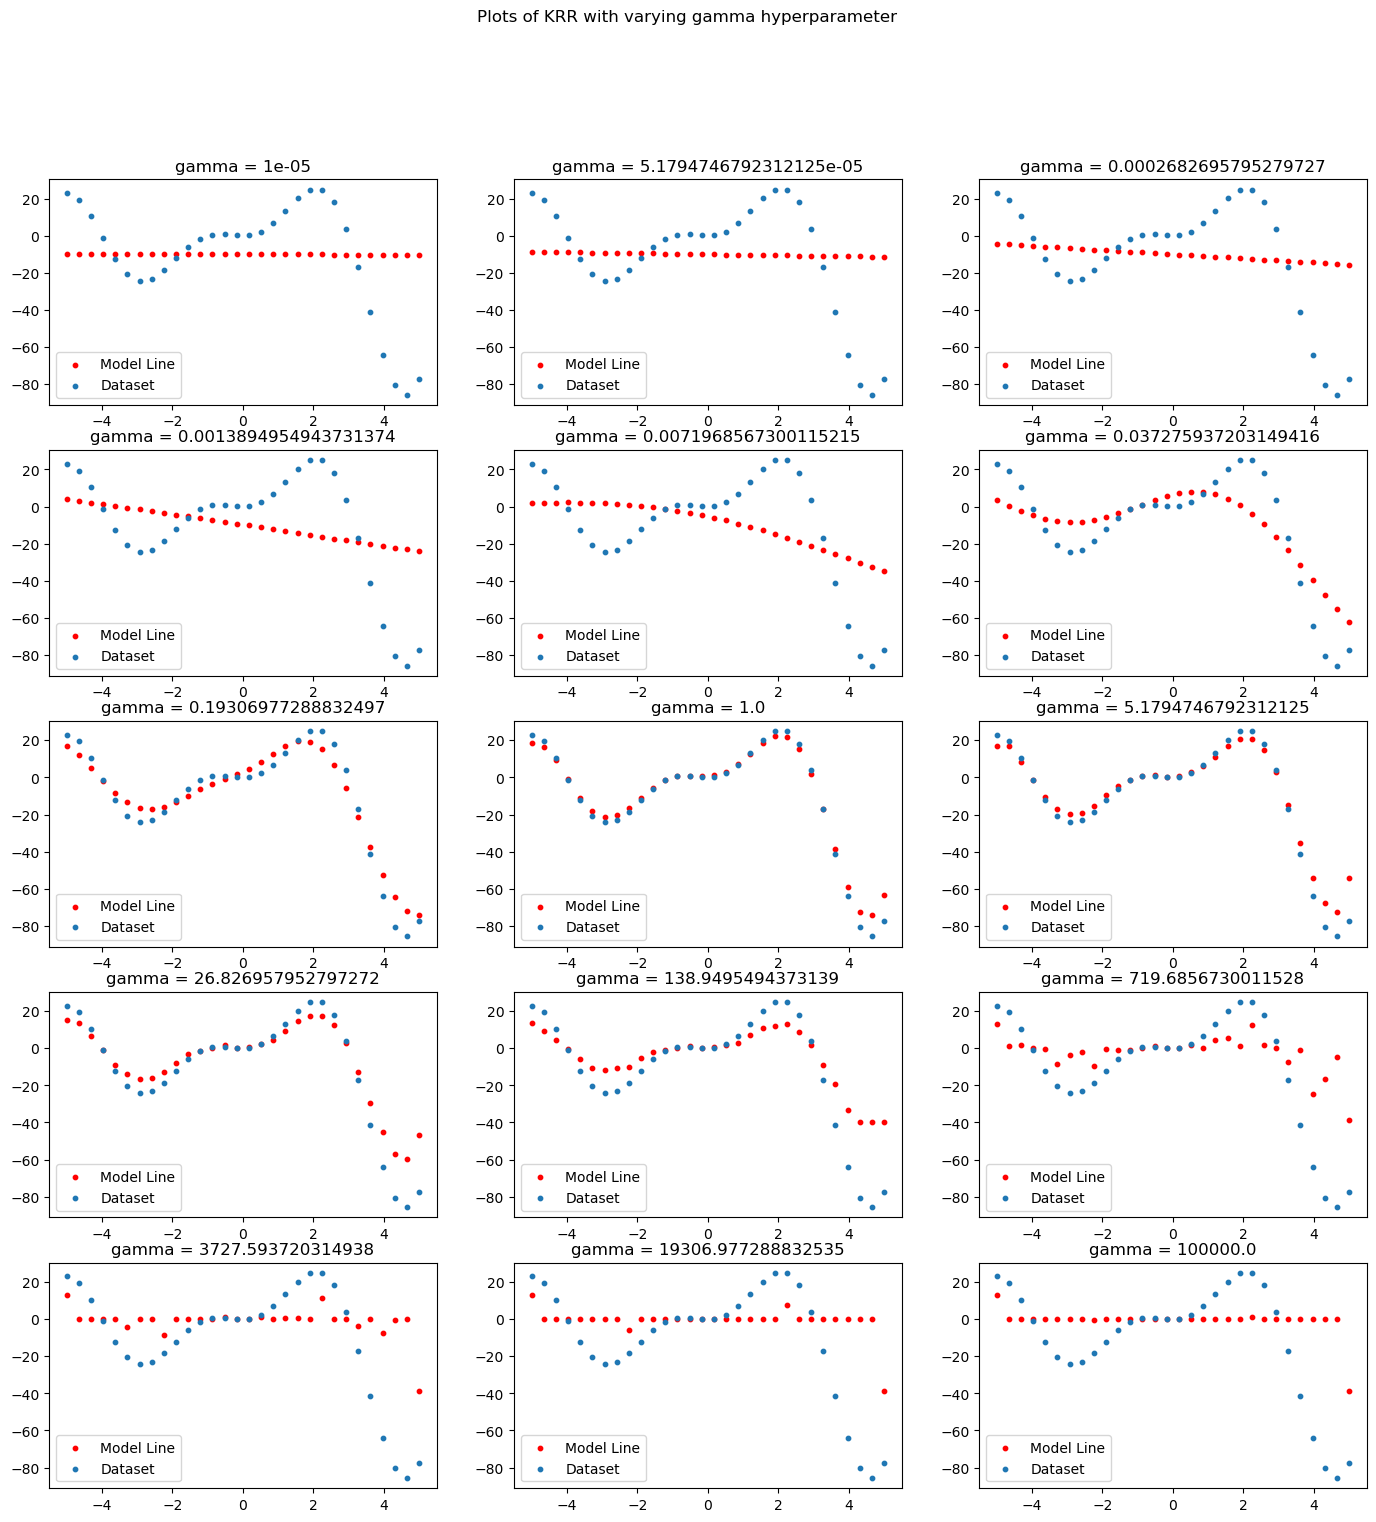

In [15]:
# Test and plot different outcoomes for different values of parameters

# RBF and gamma
fig, axes = plt.subplots(5, 3, figsize=(17,17))

ctr = 0
for i in range(5):
    for j in range(3):
        
        current_axe = axes[i][j]
        current_gamma = domain_rbf['gamma'][ctr]

        current_axe.set_title(f'gamma = {current_gamma}')
        
        KRR_i = KernelRidge(kernel='rbf', gamma=current_gamma).fit(X_train, y_train)

        current_axe.scatter(X_test, KRR_i.predict(X_test), color='r', s=10, label="Model Line")
        current_axe.scatter(X_test, y_test, s=10, label="Dataset")

        current_axe.legend()

        ctr += 1

plt.suptitle("Plots of KRR with varying gamma hyperparameter")
plt.show()

In [8]:
domain_poly['alpha']

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

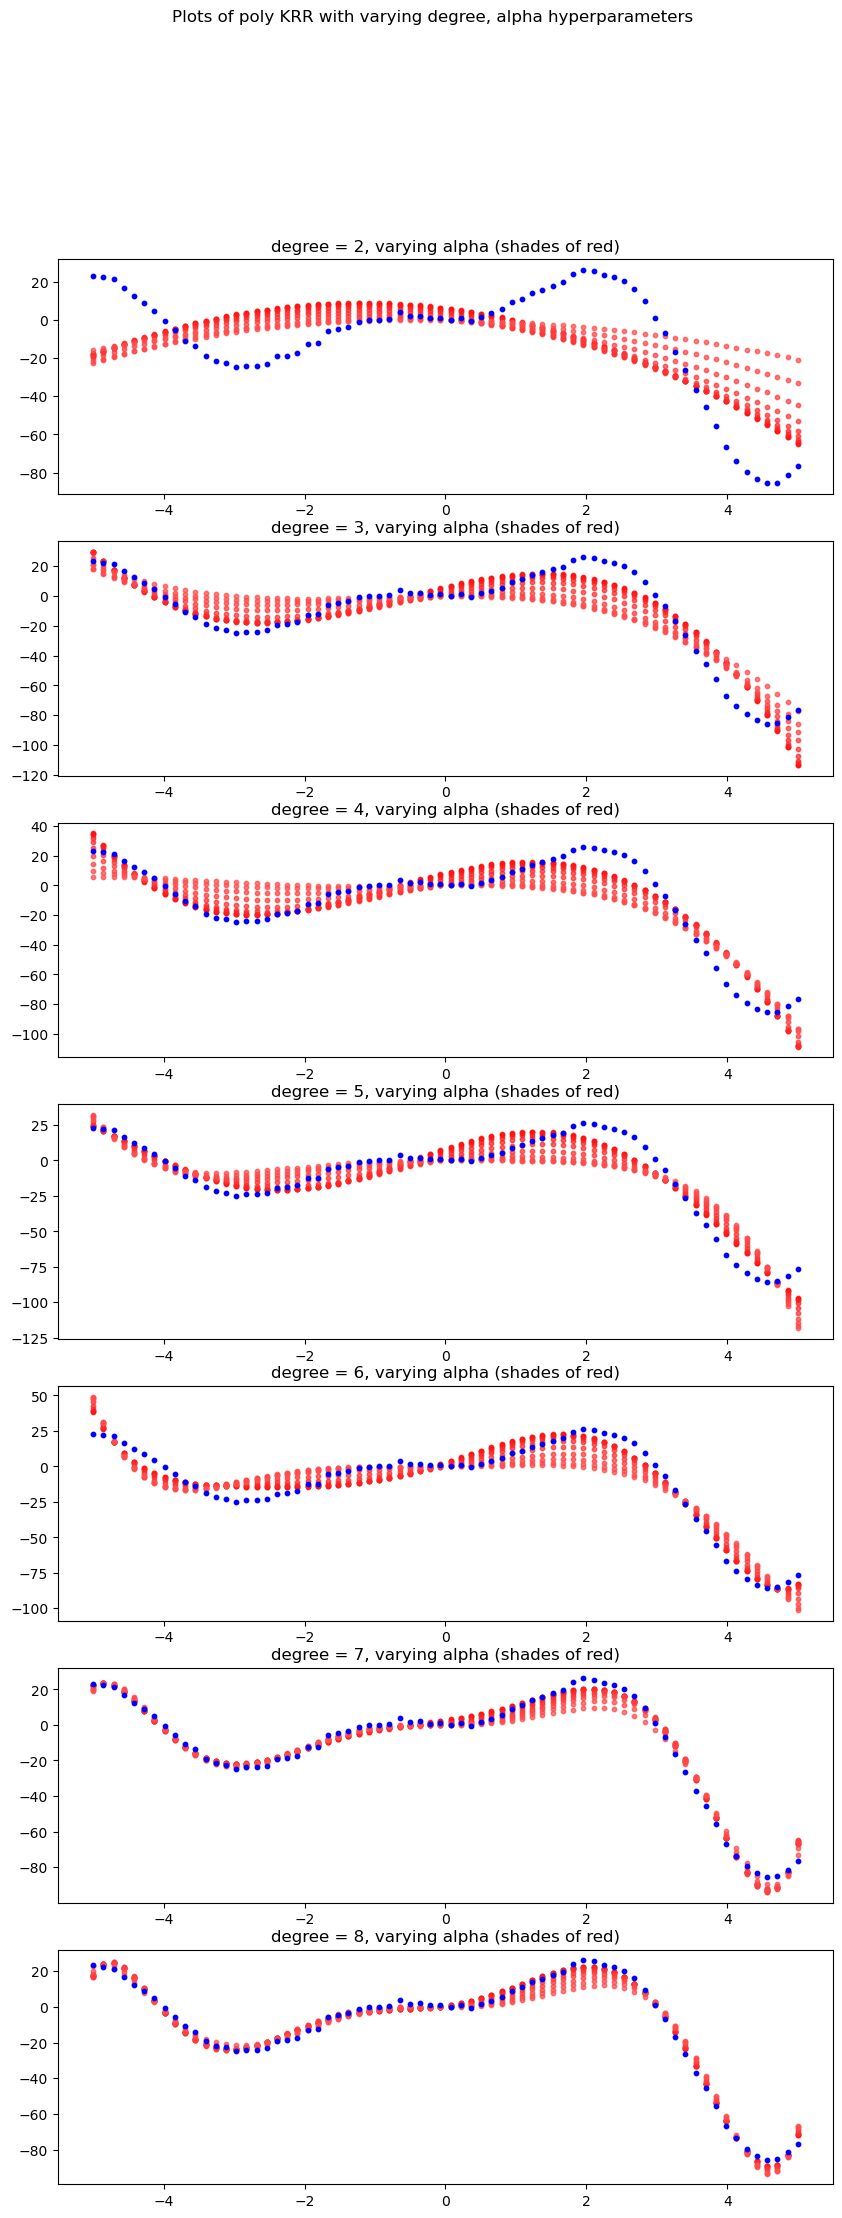

In [9]:
# poly and degree
N_DEG = len(domain_poly['degree'])
fig, axes = plt.subplots(N_DEG, figsize=(10, 25))

for i in range(N_DEG):
    current_axe = axes[i]
    current_deg = domain_poly['degree'][i]
    
    for n, alpha_i in enumerate(domain_poly['alpha']):
        current_alpha = alpha_i

        KRR_i = KernelRidge(kernel='poly', degree=current_deg, alpha=current_alpha).fit(X_train, y_train)

        current_axe.scatter(X_train, KRR_i.predict(X_train), s=10, color = (1.0, 1-(20/(n+20)), 1-(20/(n+20))), alpha=0.75)


    current_axe.scatter(X_train, y_train, color='b', s=10) 
    current_axe.set_title(f"degree = {current_deg}, varying alpha (shades of red)")

plt.suptitle("Plots of poly KRR with varying degree, alpha hyperparameters")
plt.show()

In [10]:
# Get test scores of best RBF and poly, plot the final model

test_rbf = {
    'r2' : r2_score(y_test, GSCV_rbf.best_estimator_.predict(X_test)),
    'mse' : mean_squared_error(y_test, GSCV_rbf.best_estimator_.predict(X_test))
}

test_poly = {
    'r2' : r2_score(y_test, GSCV_poly.best_estimator_.predict(X_test)),
    'mse' : mean_squared_error(y_test, GSCV_poly.best_estimator_.predict(X_test)) 
}

In [11]:
test_rbf

{'r2': 0.9809845772558599, 'mse': 17.74599776983248}

In [12]:
test_poly

{'r2': 0.8770905423849782, 'mse': 114.70431081526417}

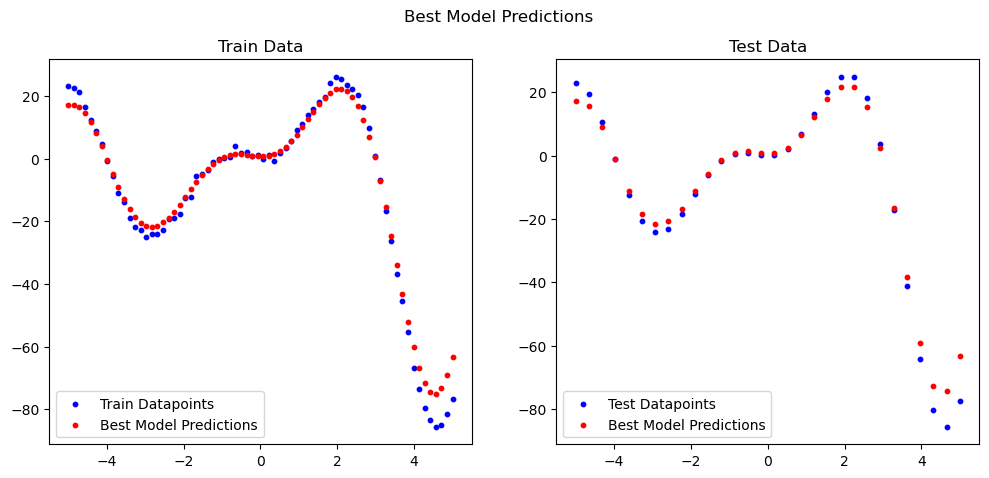

In [13]:
# Clearly RBF has the best one, so I'm plotting that one
fig, axes = plt.subplots(1,2, figsize=(12, 5))

axes[0].scatter(X_train, y_train, color="b", label="Train Datapoints", s= 10)
axes[0].scatter(X_train, GSCV_rbf.best_estimator_.predict(X_train), label='Best Model Predictions', color='r', s=10)
axes[0].legend()
axes[0].set_title("Train Data")

axes[1].scatter(X_test, y_test, color="b", label="Test Datapoints", s= 10)
axes[1].scatter(X_test, GSCV_rbf.best_estimator_.predict(X_test), label='Best Model Predictions', color='r', s=10)
axes[1].set_title("Test Data")
plt.legend()

plt.suptitle("Best Model Predictions")
plt.show()


## 2. PCA
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a PCA model;
* Fit a Kernel PCA model with a kernel of your choice.

For each subtask, plot a visual representation of the projections and verify the accuracy of that kernel on the test data set using SVM.

In [39]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

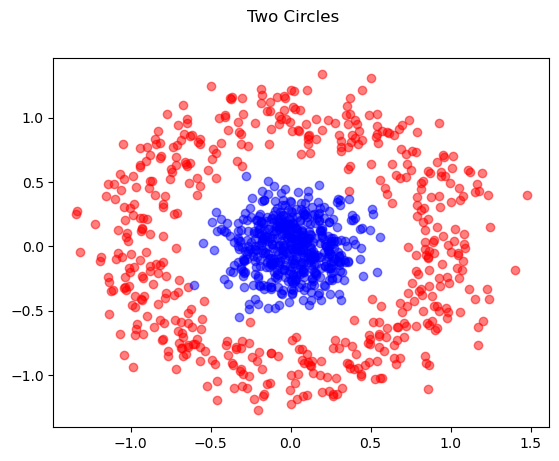

In [40]:
# Preliminary Visualization:

fig, ax = plt.subplots()

idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)

X_0 = X[idx_0]
X_1 = X[idx_1]

ax.scatter(X_0[:, 0], X_0[:, 1], color='r', alpha = 0.5)
ax.scatter(X_1[:, 0], X_1[:, 1], color='b', alpha = 0.5)

plt.suptitle("Two Circles")
plt.show()

In [41]:
# Fit PCA
from sklearn.decomposition import PCA

pca = PCA().fit(X)

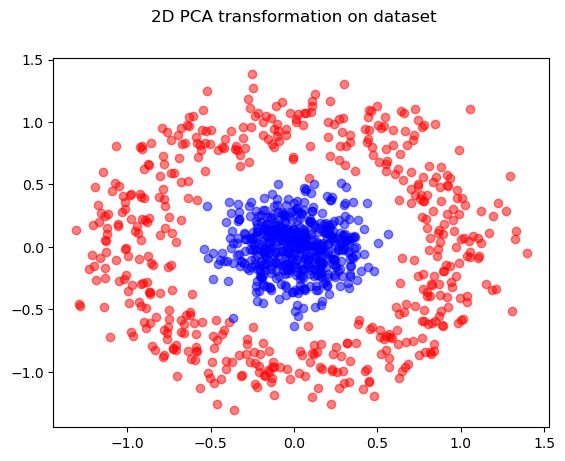

In [42]:
# 2D Representation of PCA
X_2PCA = pca.transform(X)

fig, ax = plt.subplots()

idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)

X_0 = X_2PCA[idx_0]
X_1 = X_2PCA[idx_1]

ax.scatter(X_0[:, 0], X_0[:, 1], color='r', alpha = 0.5)
ax.scatter(X_1[:, 0], X_1[:, 1], color='b', alpha = 0.5)

plt.suptitle("2D PCA transformation on dataset")
plt.show()

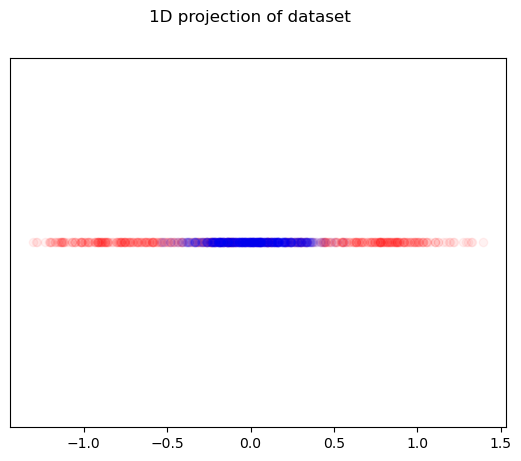

In [43]:
# 1D Representation of PCA
fig, ax = plt.subplots()

X_0 = X_2PCA[idx_0]
X_1 = X_2PCA[idx_1]

ax.scatter(X_0[:, 0], np.zeros(X_0.shape[0]), color='r', alpha = 0.05)
ax.scatter(X_1[:, 0], np.zeros(X_0.shape[0]), color='b', alpha = 0.05)

plt.yticks([])

plt.suptitle("1D projection of dataset")
plt.show()

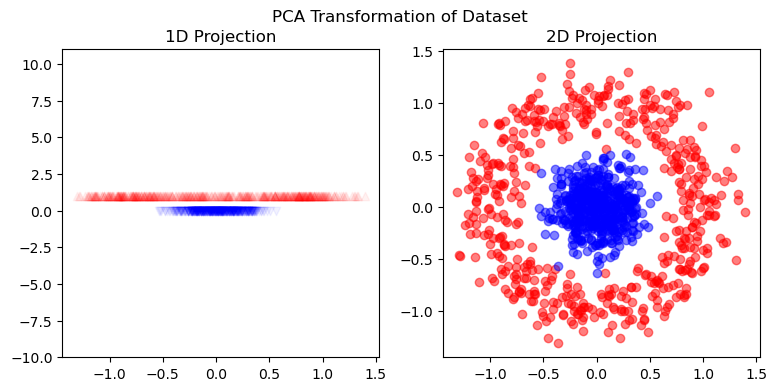

In [70]:
# Combine 2D and 1D
fig, axes = plt.subplots(1, 2, figsize=(9,4))

axes[0].scatter(X_0[:, 0], np.ones(X_0.shape[0]), color='r', alpha = 0.05, marker='^')
axes[0].scatter(X_1[:, 0], np.zeros(X_0.shape[0]), color='b', alpha = 0.05, marker='v')
axes[0].set_ylim(-10, 11)
axes[0].set_title('1D Projection')

axes[1].scatter(X_0[:, 0], X_0[:, 1], color='r', alpha = 0.5)
axes[1].scatter(X_1[:, 0], X_1[:, 1], color='b', alpha = 0.5)
axes[1].set_title('2D Projection')

plt.suptitle('PCA Transformation of Dataset')
plt.show()

In [20]:
# Using linear SVM:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

svm = LinearSVC('l2', 'hinge').fit(X_train, y_train)

print("TRAIN DATASET CLASSIFICATION REPORT")
print(classification_report(y_train, svm.predict(X_train)))

print()
print("="*60)
print()

print("TEST DATASET CLASSIFICATION REPORT")
print(classification_report(y_test, svm.predict(X_test)))


TRAIN DATASET CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.39      0.55       375
           1       0.62      0.97      0.75       375

    accuracy                           0.68       750
   macro avg       0.77      0.68      0.65       750
weighted avg       0.77      0.68      0.65       750



TEST DATASET CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.90      0.30      0.45       125
           1       0.58      0.97      0.72       125

    accuracy                           0.63       250
   macro avg       0.74      0.63      0.59       250
weighted avg       0.74      0.63      0.59       250



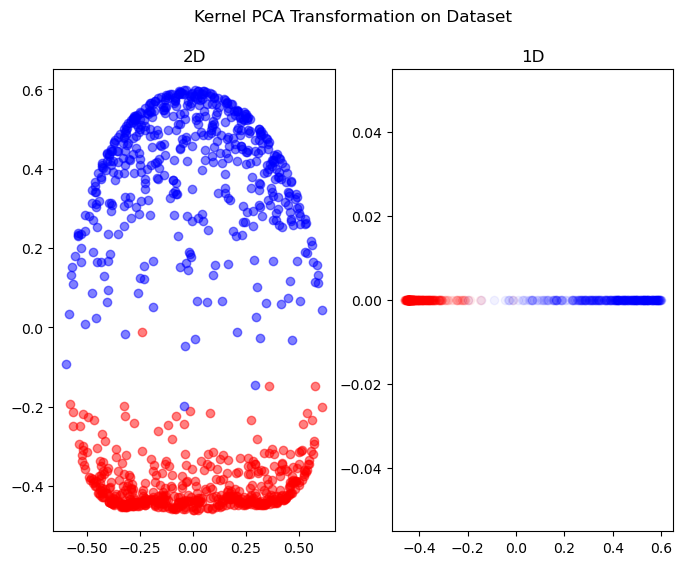

In [21]:
# RBF PCA
from sklearn.decomposition import KernelPCA

kPCA = KernelPCA(kernel='rbf', gamma=3, random_state=42).fit(X)

X_kPCA = kPCA.transform(X)

fig, ax = plt.subplots(1, 2, figsize=(8,6))

idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)

X_0 = X_kPCA[idx_0]
X_1 = X_kPCA[idx_1]

ax[0].scatter(X_0[:, 1], X_0[:, 0], color='r', alpha = 0.5)
ax[0].scatter(X_1[:, 1], X_1[:, 0], color='b', alpha = 0.5)
ax[0].set_title("2D")

ax[1].scatter(X_0[:, 0], N := np.zeros(X_0.shape[0]), color='r', alpha = 0.05)
ax[1].scatter(X_1[:, 0], N, color='b', alpha = 0.05)
ax[1].set_title("1D")

plt.suptitle("Kernel PCA Transformation on Dataset")
plt.show()

In [22]:
# Verify this kernel words by running a SVC with the same kernel
from sklearn.svm import SVC
from sklearn.metrics import classification_report

kSVM = SVC(kernel='rbf', gamma=3, random_state=42).fit(X_train, y_train)

print("TRAIN DATASET CLASSIFICATION REPORT")
print(classification_report(y_train, kSVM.predict(X_train)))

print()
print("="*60)
print()

print("TEST DATASET CLASSIFICATION REPORT")
print(classification_report(y_test, kSVM.predict(X_test)))



TRAIN DATASET CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       375

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



TEST DATASET CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       125
           1       1.00      0.98      0.99       125

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



## 3. PCA pt.2
Repeat the last point of the previous task with a dataset made with ```sklearn.datasets.make_classification()```. Find the best kernel, and comment on your discoveries in the report. What differences do you see with the previous data set?

In [74]:
from sklearn.datasets import make_classification

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

In [75]:
X.shape, y.shape

((100, 20), (100,))

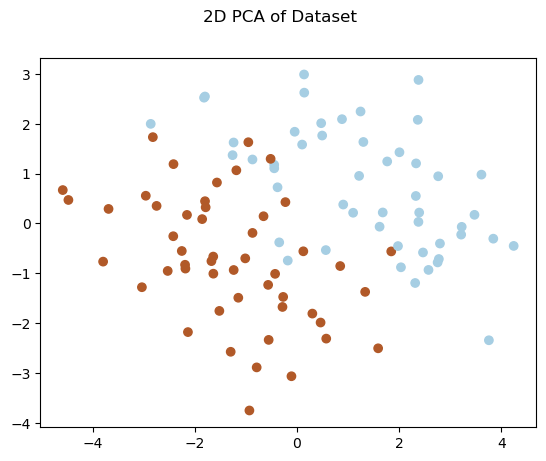

In [76]:
# PCA on 2D, 3D

pca = PCA(3).fit(X)
X_pca = pca.transform(X)

# 2D Projection
fig, ax = plt.subplots()

ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap = 'Paired')

plt.suptitle("2D PCA of Dataset")

plt.show()

In [77]:
import plotly.express as px

fig = px.scatter_3d(x = X_pca[:, 0], y= X_pca[:, 1], z = X_pca[:, 2], color = y,
                    title='3D PCA Reduced Plot')
fig.show()

In [78]:
# Fit and evaluate a SVM
from sklearn.svm import LinearSVC
svm = LinearSVC('l2', 'hinge').fit(X_train, y_train)

print("test data")
print(classification_report(
    y_test,
    svm.predict(X_test)
))

print()

print('train data')
print(classification_report(
    y_train,
    svm.predict(X_train)
))


test data
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.92      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25


train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        38

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



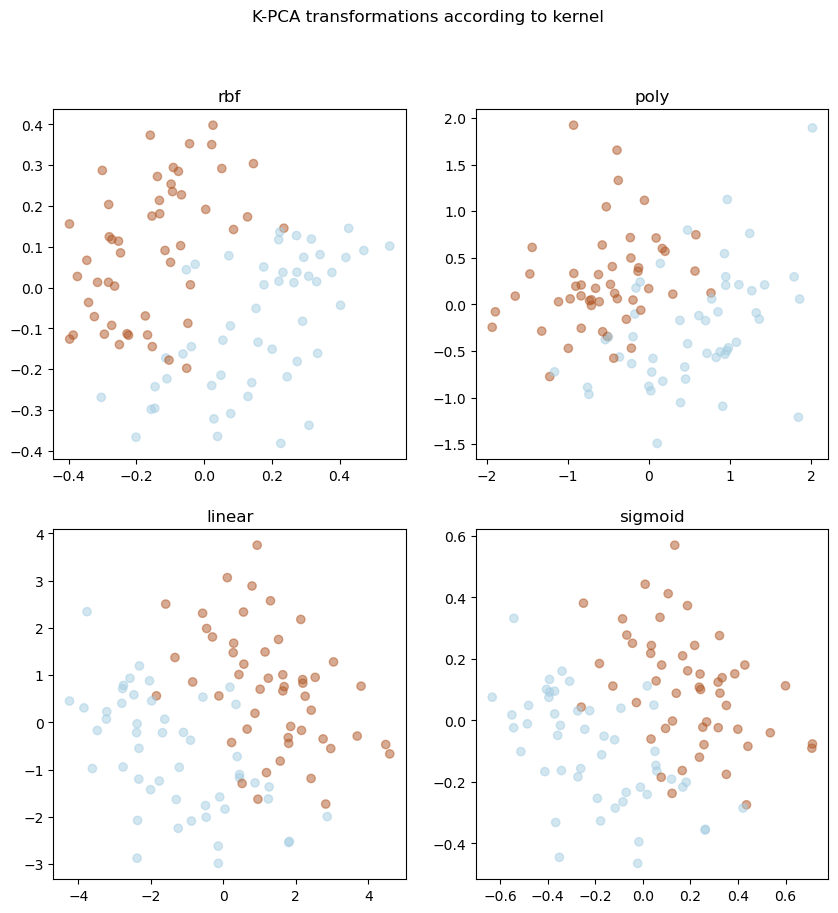

In [28]:
# Use 2D K-PCAs, plot different kernels in a single graph (without tweaking hypepraprpfejognwno)
kernels = ['rbf', 'poly', 'linear', 'sigmoid']

fig, axes = plt.subplots(2,2, figsize=(10,10))

ctr = 0
for i in range(2):
    for j in range(2):
        current_axe = axes[i][j]
        current_KPCA = KernelPCA(2, kernel=kernels[ctr]).fit(X)

        X_KPCA = current_KPCA.transform(X)

        current_axe.scatter(X_KPCA[:, 0], X_KPCA[:,1], c=y, cmap='Paired', alpha=0.5)
        current_axe.set_title(kernels[ctr])

        ctr += 1

plt.suptitle("K-PCA transformations according to kernel")
plt.show()


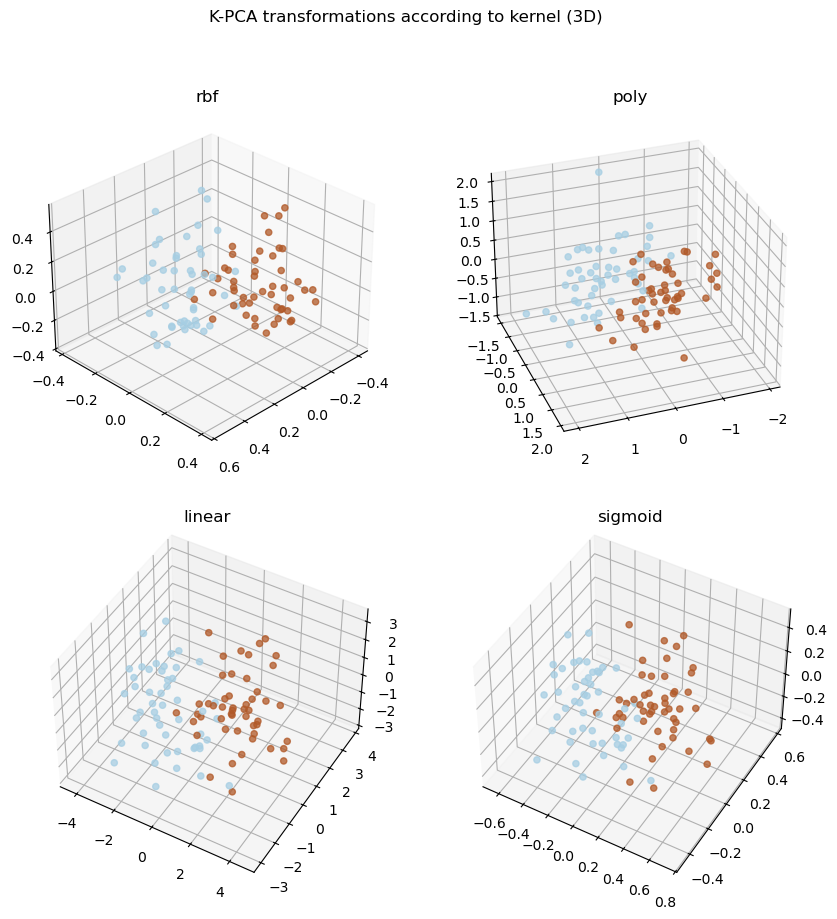

In [29]:
# Redo it in three dimensions

fig, axes = plt.subplots(2,2, figsize=(10,10), subplot_kw=dict(projection='3d'))

ctr = 0
for i in range(2):
    for j in range(2):
        current_axe = axes[i][j]
        current_KPCA = KernelPCA(3, kernel=kernels[ctr]).fit(X)

        X_KPCA = current_KPCA.transform(X)

        current_axe.scatter(X_KPCA[:, 0], X_KPCA[:,1], X_KPCA[:, 2], c=y, cmap='Paired', alpha=0.75)
        current_axe.set_title(kernels[ctr])

        ctr += 1

axes[0][0].view_init(azim=45)
axes[0][1].view_init(azim=70, elev=30)
axes[1][0].view_init(elev=45)
axes[1][1].view_init(elev=45)

plt.suptitle("K-PCA transformations according to kernel (3D)")
plt.show()


In [30]:
# Fit every kernel to get a baseline for each kernel
for kernel in kernels:
    print(f"CURRENT KERNEL: {kernel}")
    current_KSVM = SVC(kernel=kernel).fit(X_train, y_train)

    y_hat_train = current_KSVM.predict(X_train)
    y_hat_test = current_KSVM.predict(X_test)

    print("train:")
    print(classification_report(y_train, y_hat_train))

    print()

    print("test:")
    print(classification_report(y_test, y_hat_test))


CURRENT KERNEL: rbf
train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        38

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


test:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

CURRENT KERNEL: poly
train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        38

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, expon, uniform

np.random.seed(42)

domain = {
    'C':            loguniform(1e-5, 1e5),
    'kernel':       ['poly', 'rbf', 'linear', 'sigmoid'],
    'degree':       [2,3,4,5,6,7,8],
    'gamma':        loguniform(1e-5, 1e0),
    'coef0':        uniform(-10, 10),
    'random_state': [42],
    }

RSCV = RandomizedSearchCV(SVC(), domain, n_iter=5000, random_state=42, verbose=3)
RSCV.fit(X_train, y_train)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits
[CV 1/5] END C=0.05564180225431373, coef0=-0.49285693590083923, degree=4, gamma=0.07915074397656215, kernel=poly, random_state=42;, score=0.267 total time=   0.0s
[CV 2/5] END C=0.05564180225431373, coef0=-0.49285693590083923, degree=4, gamma=0.07915074397656215, kernel=poly, random_state=42;, score=0.200 total time=   0.0s
[CV 3/5] END C=0.05564180225431373, coef0=-0.49285693590083923, degree=4, gamma=0.07915074397656215, kernel=poly, random_state=42;, score=0.133 total time=   0.0s
[CV 4/5] END C=0.05564180225431373, coef0=-0.49285693590083923, degree=4, gamma=0.07915074397656215, kernel=poly, random_state=42;, score=0.267 total time=   0.0s
[CV 5/5] END C=0.05564180225431373, coef0=-0.49285693590083923, degree=4, gamma=0.07915074397656215, kernel=poly, random_state=42;, score=0.267 total time=   0.0s
[CV 1/5] END C=0.0003632339256943143, coef0=-8.440054796637973, degree=4, gamma=0.0019780827689353767, kernel=poly, ran

RandomizedSearchCV(estimator=SVC(), n_iter=5000,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DBC065F3E0>,
                                        'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DBC06938F0>,
                                        'degree': [2, 3, 4, 5, 6, 7, 8],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001DBC0692C30>,
                                        'kernel': ['poly', 'rbf', 'linear',
                                                   'sigmoid'],
                                        'random_state': [42]},
                   random_state=42, verbose=3)

In [79]:
RSCV.best_params_

{'C': 13.077707057660625,
 'coef0': -9.929336947802826,
 'degree': 2,
 'gamma': 0.0002858549394196192,
 'kernel': 'linear',
 'random_state': 42}

In [38]:
best = RSCV.best_estimator_

y_hat_train = best.predict(X_train)
y_hat_test = best.predict(X_test)

print("train:")
print(classification_report(y_train, y_hat_train))

print()

print("test:")
print(classification_report(y_test, y_hat_test))


train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        38

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


test:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.92      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25

